<h1>Student Performance Prediction</h1>

<h3>Importing Libraries</h3>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings as wr
wr.filterwarnings('ignore')

<h3>Load Dataset</h3>

In [65]:
dataset= pd.read_csv("Student_performance_data _.csv")

<h3>To display the first 5 rows of all feature </h3>

In [66]:
print(f"Top 5 rows:\n {dataset.head()}")

Top 5 rows:
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1    

<h3>To display last 7 rows of all features.</h3>

In [67]:
print(f"Last 7 rows:\n {dataset.tail(7)}")

Last 7 rows:
       StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
2385       3386   16       1          0                  1         1.445434   
2386       3387   16       0          0                  2        13.814021   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
2385        20         0                3                1       1      0   
2386        14         0                2                0       0      0   
2387         2         0                4                1       0      0   
2388         4         1                4    

<h3>Check the total number of NULL values contain in specific features.</h3>

In [68]:
dataset.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [69]:
dataset=dataset[["Age","Gender","ParentalEducation","StudyTimeWeekly","Absences","Tutoring","ParentalSupport","GPA","GradeClass"]]

<h3>Check and represent the total information of dataset for preprocessing</h3>

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   ParentalEducation  2392 non-null   int64  
 3   StudyTimeWeekly    2392 non-null   float64
 4   Absences           2392 non-null   int64  
 5   Tutoring           2392 non-null   int64  
 6   ParentalSupport    2392 non-null   int64  
 7   GPA                2392 non-null   float64
 8   GradeClass         2392 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 168.3 KB


<h3>To display the values for each feature like mean, standard daviation, minimum value, maximum value...

In [71]:
dataset.describe()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,1.746237,9.771992,14.541388,0.301421,2.122074,1.906186,2.983696
std,1.123798,0.499986,1.000411,5.652774,8.467417,0.458971,1.122813,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,1.174803,2.000000
50%,16.000000,1.000000,2.000000,9.705363,15.000000,0.000000,2.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,14.408410,22.000000,1.000000,3.000000,2.622216,4.000000
max,18.000000,1.000000,4.000000,19.978094,29.000000,1.000000,4.000000,4.000000,4.000000


<h3>Check the correlations of different features for target feature.</h3>

In [72]:
print(dataset.corr()["GradeClass"].abs().sort_values(ascending=False))

GradeClass           1.000000
GPA                  0.782835
Absences             0.728633
ParentalSupport      0.136823
StudyTimeWeekly      0.134131
Tutoring             0.111695
ParentalEducation    0.041031
Gender               0.022998
Age                  0.006250
Name: GradeClass, dtype: float64


<h3>To count total number of 0 and 1 values.</h3>

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


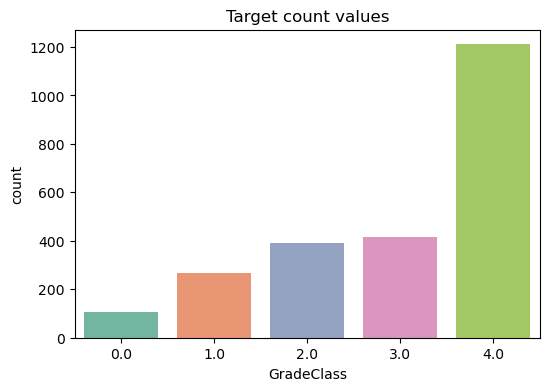

In [73]:
print(dataset['GradeClass'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x=dataset.GradeClass,palette="Set2")
plt.title("Target count values")
plt.show()

<h3>Seperate the features as for dependent and independent variables.</h3>

In [74]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

<h3>To do feature scalling for better training model and within range of -1,1 </h3>

In [75]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
x=SS.fit_transform(x)

<h3>Spliting the data for training and testing</h3>

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x , y , test_size=0.2, random_state=42)

<h3>Importing and training models.</h3>

In [77]:
from sklearn.linear_model import LogisticRegression
L_model = LogisticRegression()
L_model.fit(x_train , y_train)

LogisticRegression()

In [78]:
from sklearn.svm import SVC
svm_model= SVC()
svm_model.fit(x_train , y_train)

SVC()

In [79]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train , y_train)


DecisionTreeClassifier()

In [80]:
from sklearn.ensemble import RandomForestClassifier
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train , y_train)

RandomForestClassifier(n_estimators=20)

<h3>Predict values by giving x_test.</h3>

In [81]:
# prediction for Logistic Regression
L_pred= L_model.predict(x_test)

# prediction for Support Vector Machine  
svm_pred= svm_model.predict(x_test)

# prediction for Decision Tree
DT_pred= DT_model.predict(x_test)

# prediction for Random Forest
RF_pred= RF_model.predict(x_test)

<h3>Make the model evaluation for Logictic Regresion.</h3>

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, L_pred))
print("Precision:", precision_score(y_test, L_pred, average='macro'))
print("Recall:", recall_score(y_test, L_pred, average='macro'))
print("F1 Score:", f1_score(y_test, L_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, L_pred))

# precision = precision_score(y_test, y_pred, average='macro')  # or 'weighted'
# recall = recall_score(y_test, y_pred, average='macro')
# f1 = f1_score(y_test, y_pred, average='macro')

Accuracy: 0.7724425887265136
Precision: 0.5595323463536583
Recall: 0.571473212187436
F1 Score: 0.5607262976086206
Confusion Matrix:
 [[  0  15   3   2   2]
 [  1  32  11   1   4]
 [  0  12  56  12   5]
 [  0   2  14  48  22]
 [  0   1   0   2 234]]


<h3>Visualization of Confusion Matrix.</h3>

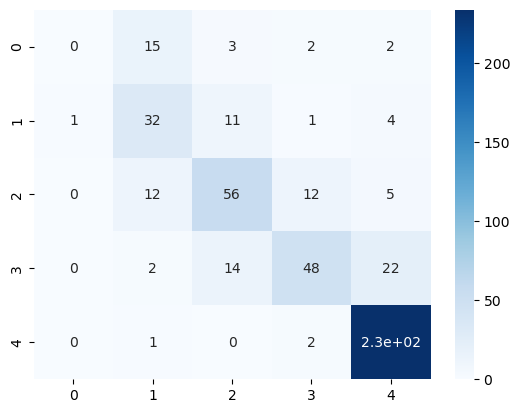

In [83]:
sns.heatmap(confusion_matrix(y_test, L_pred), annot=True, cmap='Blues')
plt.show()

<h3>Make the model evaluation for Support Vector Machine Classifier.</h3>

In [84]:
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred, average='macro'))
print("Recall:", recall_score(y_test, svm_pred, average='macro'))
print("F1 Score:", f1_score(y_test, svm_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

Accuracy: 0.8037578288100209
Precision: 0.7438804904209677
Recall: 0.639137295295992
F1 Score: 0.6471828927883254
Confusion Matrix:
 [[  3  12   3   2   2]
 [  1  34   9   1   4]
 [  0   9  59  12   5]
 [  0   3   5  61  17]
 [  0   1   0   8 228]]


<h3>Visualization of Confusion Matrix.</h3>

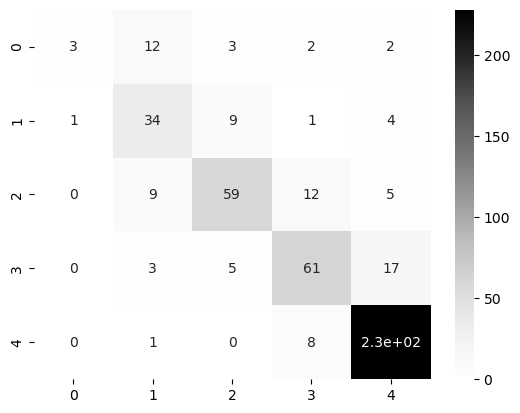

In [85]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, cmap='Greys')
plt.show()

<h3>Make the model evaluation for Decision Tree.</h3>

In [86]:
print("Accuracy:", accuracy_score(y_test, DT_pred))
print("Precision:", precision_score(y_test, DT_pred, average='macro'))
print("Recall:", recall_score(y_test, DT_pred, average='macro'))
print("F1 Score:", f1_score(y_test, DT_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, DT_pred))

Accuracy: 0.8329853862212944
Precision: 0.7648001004927918
Recall: 0.7734391847567833
F1 Score: 0.7657882476157688
Confusion Matrix:
 [[ 12   2   3   2   3]
 [  1  42   1   2   3]
 [  5   3  64   5   8]
 [  0   4   2  71   9]
 [  2  13   7   5 210]]


<h3>Visualization of Confusion Matrix.</h3>

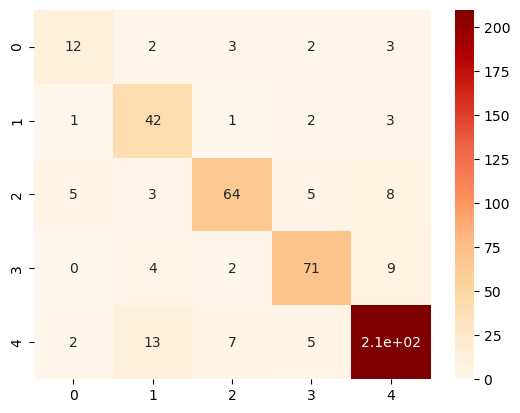

In [87]:
sns.heatmap(confusion_matrix(y_test, DT_pred), annot=True, cmap='OrRd')
plt.show()

<h3>Make the model evaluation for Random Forest.</h3>

In [88]:
print("Accuracy:", accuracy_score(y_test, RF_pred))
print("Precision:", precision_score(y_test, RF_pred, average='macro'))
print("Recall:", recall_score(y_test, RF_pred, average='macro'))
print("F1 Score:", f1_score(y_test, RF_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, RF_pred))

Accuracy: 0.906054279749478
Precision: 0.8728542061986084
Recall: 0.8057149755826541
F1 Score: 0.8277931984997082
Confusion Matrix:
 [[ 10   5   3   2   2]
 [  1  41   2   1   4]
 [  1   2  73   5   4]
 [  0   2   2  77   5]
 [  0   1   0   3 233]]


<h3>Visualization of Confusion Matrix.</h3>

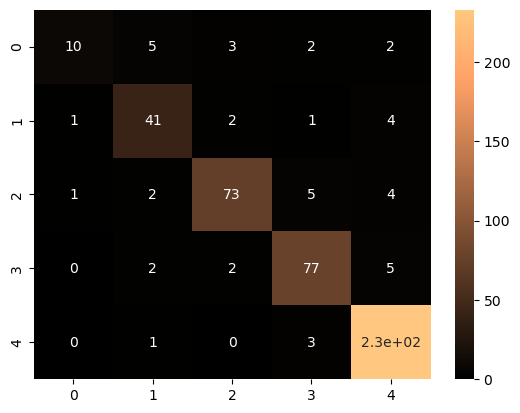

In [89]:
sns.heatmap(confusion_matrix(y_test,RF_pred),annot= True, cmap='copper')
plt.show()

<h2>MODELS PERFORMANCE.</h2>

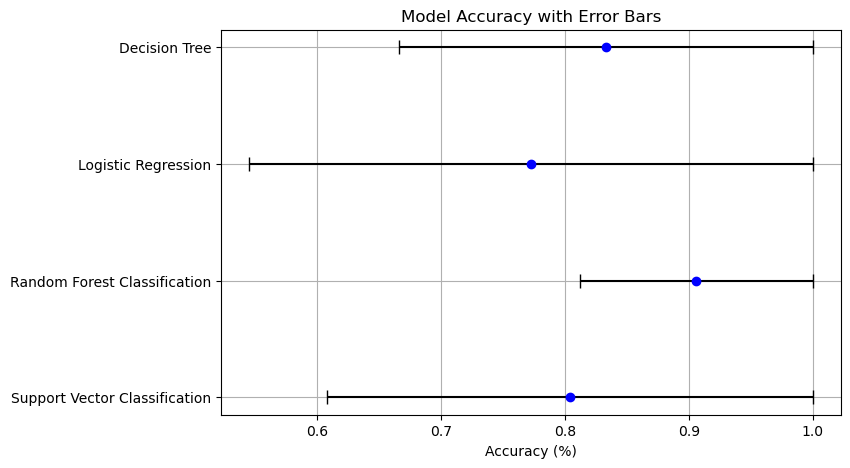

In [90]:
models = ['Support Vector Classification', 'Random Forest Classification',
           'Logistic Regression', 'Decision Tree']

accuracy= [accuracy_score(y_test, svm_pred),accuracy_score(y_test, RF_pred),
          accuracy_score(y_test, L_pred),accuracy_score(y_test, DT_pred)]

errors = [1-accuracy_score(y_test, svm_pred), 1-accuracy_score(y_test, RF_pred),
         1-accuracy_score(y_test, L_pred),1-accuracy_score(y_test, DT_pred)]

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.errorbar(accuracy, models, xerr=errors, fmt='o', color='blue', ecolor='black', capsize=5)
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy with Error Bars')
plt.grid(True)
plt.show()

<h2>MODELS PERFORMANCE FOR ACCURACY</h2>

<Axes: title={'center': 'Model Performances'}, xlabel='Algorithms', ylabel='Accuracy score'>

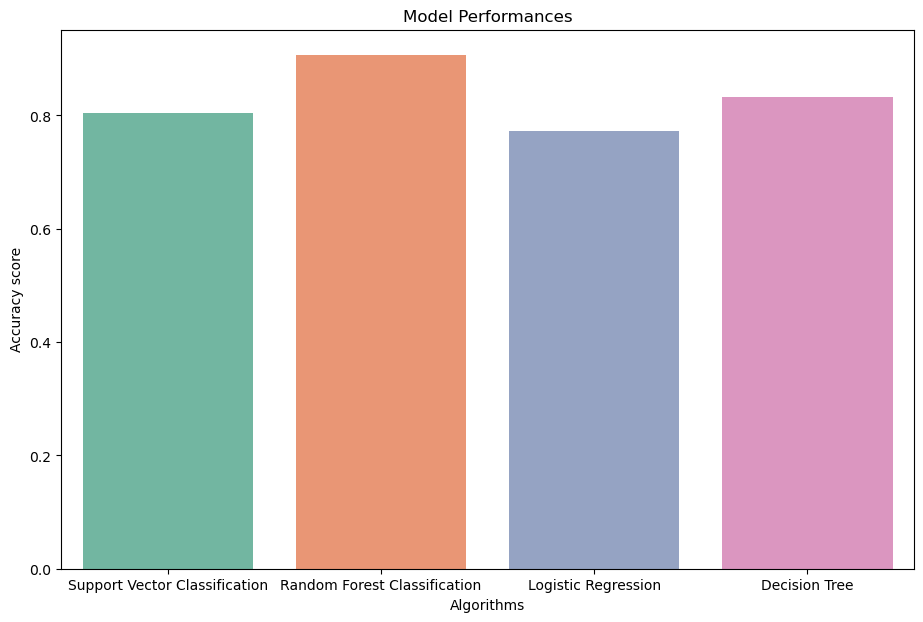

In [91]:
# sns.set(rc={'figure.figsize':(15,8)})
plt.figure(figsize=(11,7))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Model Performances")

sns.barplot(x=models, y=accuracy, palette="Set2")

In [92]:
pickle.dump(L_model,open("L_model","wb"))
pickle.dump(svm_model,open("svm_model","wb"))
pickle.dump(DT_model,open("DT_model","wb"))
pickle.dump(RF_model,open("RF_model","wb"))